<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Gleb/gleb_notebook/Gleb_notebook_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr>
    <th>layer</th>
    <th>layer type2</th>
    <th>feature maps</th>
    <th>size</th>
    <th>kernel size</th>
    <th>stride</th>
    <th>padding</th>
    <th>activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>3</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>tanh</th>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>6</th>
    <th>26*26</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>tanh</th>
  </tr>
  </tr>
    <tr>
    <th>1</th>
    <th>convoluation</th>
    <th>9</th>
    <th>24*24</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>2</th>
    <th>average pooling</th>
    <th>9</th>
    <th>12*12</th>
    <th>2*2</th>
    <th>2</th>
    <th>2</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>12</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>0</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convoluation</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>4</th>
    <th>average pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>5</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>6</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>tanh</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>10</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

train dataset: MNIST + EMNIST letters

test dataset: dataset of DreamTeam

training sample size: 36960

testing sample size: 16784

loss finction: Cross Entropy Loss

optimizer: adam

learning rate: 0.001

batch size: 560

epoch number: 100

In [1]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar
import pickle
import numpy as np
import scipy.stats as stats

In [2]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36482, done.
remote: Counting objects: 100% (12842/12842), done.
remote: Compressing objects: 100% (12679/12679), done.
remote: Total 36482 (delta 180), reused 12796 (delta 156), pack-reused 23640
Receiving objects: 100% (36482/36482), 128.56 MiB | 22.44 MiB/s, done.
Resolving deltas: 100% (465/465), done.


In [3]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:15<00:00, 36303112.96it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


#Third exploration
#First task

In [ ]:
class LeNetThirdNoSkip(torch.nn.Module):
  def __init__(self):
    super(LeNetThirdNoSkip, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.act1 = torch.nn.Tanh()
    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.act2 = torch.nn.Tanh()

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act3 = torch.nn.Tanh()

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.act4 = torch.nn.Tanh()

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.act5 = torch.nn.Tanh()

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.Tanh()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.act7 = torch.nn.Tanh()
    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.act8 = torch.nn.Tanh()

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act9 = torch.nn.Tanh()

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act10 = torch.nn.Tanh()

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.Tanh()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.act3(x)

    x = self.conv4(x)
    x = self.act4(x)
    x = self.conv5(x)
    x = self.act5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)

    x = self.conv8(x)
    x = self.act9(x)
    x = self.conv9(x)
    x = self.act10(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [ ]:
class LeNetThirdWithSkip(torch.nn.Module):
  def __init__(self):
    super(LeNetThirdWithSkip, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.act1 = torch.nn.Tanh()
    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.act2 = torch.nn.Tanh()

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act3 = torch.nn.Tanh()

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.act4 = torch.nn.Tanh()

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.act5 = torch.nn.Tanh()

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = torch.nn.Tanh()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.act7 = torch.nn.Tanh()
    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.act8 = torch.nn.Tanh()

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act9 = torch.nn.Tanh()

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act10 = torch.nn.Tanh()

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = torch.nn.Tanh()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = torch.nn.Tanh()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = torch.nn.Tanh()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)

    skip_conection3 = x
    x = self.conv3(x)
    x = self.act3(x)
    x = torch.add(x, skip_conection3)

    x = self.conv4(x)
    x = self.act4(x)

    skip_conection5 = x
    x = self.conv5(x)
    x = self.act5(x)
    x = torch.add(x, skip_conection5)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)

    x = self.conv8(x)
    x = self.act9(x)

    skip_conection9 = x
    x = self.conv9(x)
    x = self.act10(x)
    x = torch.add(x, skip_conection9)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [ ]:
lenet = LeNetThirdNoSkip().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
train_accuracy = []
validation_accuracy = []
test_accuracy = []
train_loss = []
validation_loss = []
test_loss = []
batch_size = 560
for epoch in bar(range(100), desc = 'learning'):
  indexs = np.random.permutation(len(train_data))
  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()
    batch_index = indexs[start_index: start_index + batch_size]
    labels_batch = train_labels[batch_index].to(device)

    images_batch = train_data[batch_index].to(device)
    prediction = lenet.forward(images_batch)
    loss_value = loss(prediction, labels_batch)
    loss_value.backward()
    optimizer.step()

  with torch.no_grad():
    prediction_train = lenet.forward(train_data)
    prediction_validation = lenet.forward(val_data)
    prediction_test = lenet.forward(test_data)

    train_loss.append(loss(prediction_train, train_labels).data.cpu())
    validation_loss.append(loss(prediction_validation, val_labels).data.cpu())
    test_loss.append(loss(prediction_test, test_labels).data.cpu())

    train_acc = (prediction_train.argmax(dim = 1) == train_labels).float().mean().data.cpu()
    validation_acc = (prediction_validation.argmax(dim = 1) == val_labels).float().mean().data.cpu()
    test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()

    train_accuracy.append(train_acc)
    validation_accuracy.append(validation_acc)
    test_accuracy.append(test_acc)

<ipython-input-10-bbe6e6407d23>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning'):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 0, 'epoch')

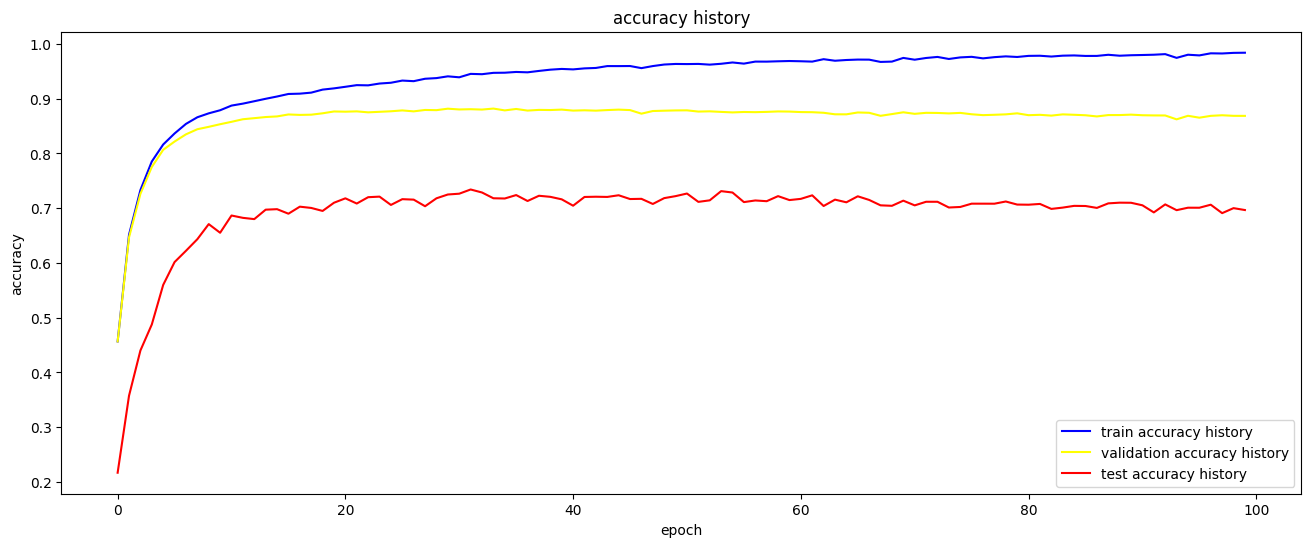

In [ ]:
plt.figure(figsize= (16.0, 6.0))
plt.plot(range(100), train_accuracy, c = 'blue', label = 'train accuracy history')
plt.plot(range(100), validation_accuracy, c = 'yellow', label = 'validation accuracy history')
plt.plot(range(100), test_accuracy, c = 'red', label = 'test accuracy history')
plt.legend(loc = 'lower right')
plt.title('accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
lenet = LeNetThirdWithSkip().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
train_accuracy = []
validation_accuracy = []
test_accuracy = []
train_loss = []
validation_loss = []
test_loss = []
batch_size = 560
for epoch in bar(range(100), desc = 'learning'):
  indexs = np.random.permutation(len(train_data))
  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()
    batch_index = indexs[start_index: start_index + batch_size]
    labels_batch = train_labels[batch_index].to(device)

    images_batch = train_data[batch_index].to(device)
    prediction = lenet.forward(images_batch)
    loss_value = loss(prediction, labels_batch)
    loss_value.backward()
    optimizer.step()

  with torch.no_grad():
    prediction_train = lenet.forward(train_data)
    prediction_validation = lenet.forward(val_data)
    prediction_test = lenet.forward(test_data)

    train_loss.append(loss(prediction_train, train_labels).data.cpu())
    validation_loss.append(loss(prediction_validation, val_labels).data.cpu())
    test_loss.append(loss(prediction_test, test_labels).data.cpu())

    train_acc = (prediction_train.argmax(dim = 1) == train_labels).float().mean().data.cpu()
    validation_acc = (prediction_validation.argmax(dim = 1) == val_labels).float().mean().data.cpu()
    test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()

    train_accuracy.append(train_acc)
    validation_accuracy.append(validation_acc)
    test_accuracy.append(test_acc)

<ipython-input-12-6f984bf2fe58>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(100), desc = 'learning'):


learning:   0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 0, 'epoch')

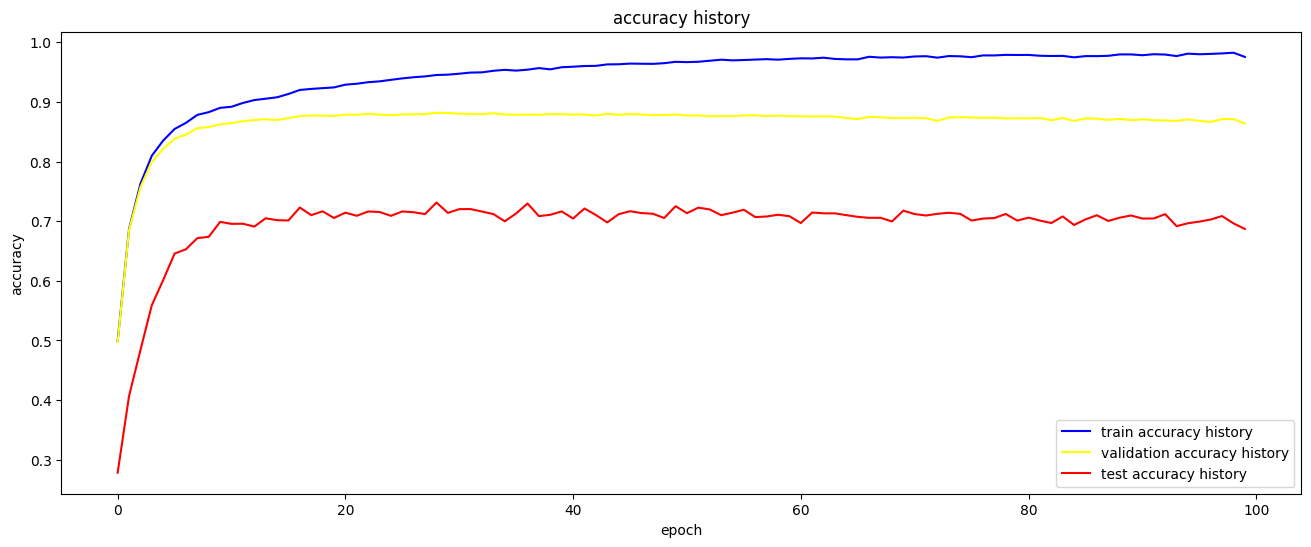

In [ ]:
plt.figure(figsize= (16.0, 6.0))
plt.plot(range(100), train_accuracy, c = 'blue', label = 'train accuracy history')
plt.plot(range(100), validation_accuracy, c = 'yellow', label = 'validation accuracy history')
plt.plot(range(100), test_accuracy, c = 'red', label = 'test accuracy history')
plt.legend(loc = 'lower right')
plt.title('accuracy history')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [ ]:
lenets =[LeNetThirdNoSkip, LeNetThirdWithSkip]
for nets in bar(range(2), desc = "Nets"):
    test_accuracy = []
    for experemets in bar(range(20), desc = "experiments"):
        batch_size = 560
        lenet = lenets[nets]().to(device)
        loss = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
        for epoch in range(100):
          indexs = np.random.permutation(len(train_data))
          for start_index in range(0, len(train_data), batch_size):
            optimizer.zero_grad()
            batch_index = indexs[start_index: start_index + batch_size]
            labels_batch = train_labels[batch_index].to(device)

            images_batch = train_data[batch_index].to(device)
            prediction = lenet.forward(images_batch)
            loss_value = loss(prediction, labels_batch)
            loss_value.backward()
            optimizer.step()

        with torch.no_grad():
          prediction_test = lenet.forward(test_data)
          test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
          test_accuracy.append(test_acc)

        print(test_acc)

    print(*test_accuracy)

<ipython-input-15-5cd645bd520c>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for nets in bar(range(2), desc = "Nets"):


Nets:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-15-5cd645bd520c>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments"):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7238)
tensor(0.7225)
tensor(0.7101)
tensor(0.6917)
tensor(0.7197)
tensor(0.7132)
tensor(0.6997)
tensor(0.7283)
tensor(0.7156)
tensor(0.7066)
tensor(0.6964)
tensor(0.7188)
tensor(0.7183)
tensor(0.7163)
tensor(0.7234)
tensor(0.7106)
tensor(0.7027)
tensor(0.7265)
tensor(0.7128)
tensor(0.7105)
tensor(0.7238) tensor(0.7225) tensor(0.7101) tensor(0.6917) tensor(0.7197) tensor(0.7132) tensor(0.6997) tensor(0.7283) tensor(0.7156) tensor(0.7066) tensor(0.6964) tensor(0.7188) tensor(0.7183) tensor(0.7163) tensor(0.7234) tensor(0.7106) tensor(0.7027) tensor(0.7265) tensor(0.7128) tensor(0.7105)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6984)
tensor(0.7041)
tensor(0.7039)
tensor(0.6976)
tensor(0.7127)
tensor(0.6837)
tensor(0.6887)
tensor(0.6887)
tensor(0.6880)
tensor(0.6943)
tensor(0.6828)
tensor(0.7099)
tensor(0.7144)
tensor(0.6929)
tensor(0.6979)
tensor(0.7051)
tensor(0.6965)
tensor(0.7037)
tensor(0.7013)
tensor(0.6844)
tensor(0.6984) tensor(0.7041) tensor(0.7039) tensor(0.6976) tensor(0.7127) tensor(0.6837) tensor(0.6887) tensor(0.6887) tensor(0.6880) tensor(0.6943) tensor(0.6828) tensor(0.7099) tensor(0.7144) tensor(0.6929) tensor(0.6979) tensor(0.7051) tensor(0.6965) tensor(0.7037) tensor(0.7013) tensor(0.6844)


In [ ]:
sample1 = "tensor(0.7238) tensor(0.7225) tensor(0.7101) tensor(0.6917) tensor(0.7197) tensor(0.7132) tensor(0.6997) tensor(0.7283) tensor(0.7156) tensor(0.7066) tensor(0.6964) tensor(0.7188) tensor(0.7183) tensor(0.7163) tensor(0.7234) tensor(0.7106) tensor(0.7027) tensor(0.7265) tensor(0.7128) tensor(0.7105)"
sample2 = "tensor(0.6984) tensor(0.7041) tensor(0.7039) tensor(0.6976) tensor(0.7127) tensor(0.6837) tensor(0.6887) tensor(0.6887) tensor(0.6880) tensor(0.6943) tensor(0.6828) tensor(0.7099) tensor(0.7144) tensor(0.6929) tensor(0.6979) tensor(0.7051) tensor(0.6965) tensor(0.7037) tensor(0.7013) tensor(0.6844)"

samples = [sample1, sample2]
for i in range(len(samples)):
    samples[i] = samples[i].replace("tensor(", '')
    samples[i] = samples[i].replace(')', '')
    samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb599162da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb5991632e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb599162b00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb599163820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb599163ac0>,
 'means': []}

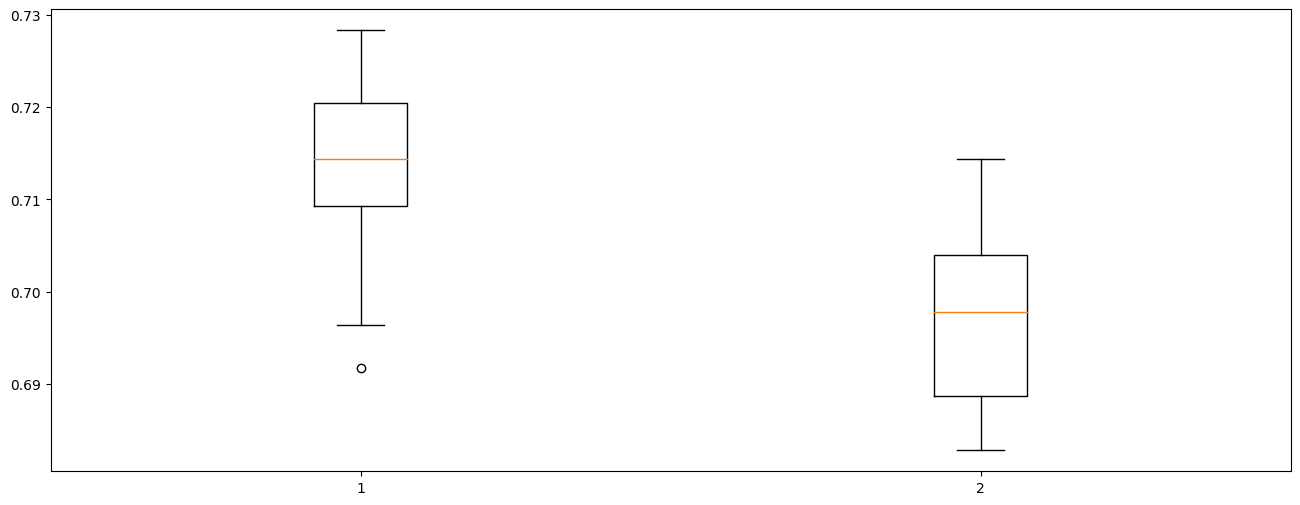

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

8.586287665354406e-06

#Second task

In [4]:
class LeNetThird(torch.nn.Module):
  def __init__(self, act_function):
    super(LeNetThird, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, padding = 1)
    self.act1 = act_function()
    self.conv2 = torch.nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 3, padding = 0)
    self.act2 = act_function()

    self.conv3 = torch.nn.Conv2d(in_channels = 6, out_channels = 6, kernel_size = 3, padding = 1)
    self.act3 = act_function()

    self.conv4 = torch.nn.Conv2d(in_channels = 6, out_channels = 9, kernel_size = 3, padding = 0)
    self.act4 = act_function()

    self.conv5 = torch.nn.Conv2d(in_channels = 9, out_channels = 9, kernel_size = 3, padding = 1)
    self.act5 = act_function()

    self.pool1 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act6 = act_function()

    self.conv6 = torch.nn.Conv2d(in_channels = 9, out_channels = 12, kernel_size = 3, padding = 1)
    self.act7 = act_function()
    self.conv7 = torch.nn.Conv2d(in_channels = 12, out_channels = 16, kernel_size = 3, padding = 0)
    self.act8 = act_function()

    self.conv8 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act9 = act_function()

    self.conv9 = torch.nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding = 1)
    self.act10 = act_function()

    self.pool2 = torch.nn.AvgPool2d(kernel_size = 2, stride = 2)
    self.act11 = act_function()
    self.fc1 = torch.nn.Linear(400, 120)
    self.act12 = act_function()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act13 = act_function()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.act3(x)

    x = self.conv4(x)
    x = self.act4(x)
    x = self.conv5(x)
    x = self.act5(x)

    x = self.pool1(x)
    x = self.act6(x)

    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)

    x = self.conv8(x)
    x = self.act9(x)
    x = self.conv9(x)
    x = self.act10(x)

    x = self.pool2(x)
    x = self.act11(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act12(x)
    x = self.fc2(x)
    x = self.act13(x)
    x = self.fc3(x)

    return x

In [ ]:
activation_functions =[torch.nn.LeakyReLU, torch.nn.PReLU, torch.nn.ReLU, torch.nn.ReLU6, torch.nn.SELU, torch.nn.Tanh]
for act_f in bar(range(6), desc = "Nets"):
    test_accuracy = []
    for experemets in bar(range(20), desc = "experiments"):
        batch_size = 560
        lenet = LeNetThird(activation_functions[act_f]).to(device)
        loss = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
        for epoch in range(100):
          indexs = np.random.permutation(len(train_data))
          for start_index in range(0, len(train_data), batch_size):
            optimizer.zero_grad()
            batch_index = indexs[start_index: start_index + batch_size]
            labels_batch = train_labels[batch_index].to(device)

            images_batch = train_data[batch_index].to(device)
            prediction = lenet.forward(images_batch)
            loss_value = loss(prediction, labels_batch)
            loss_value.backward()
            optimizer.step()

        with torch.no_grad():
          prediction_test = lenet.forward(test_data)
          test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
          test_accuracy.append(test_acc)

        print(test_acc)

    print(*test_accuracy)

<ipython-input-6-86332d8e4795>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for act_f in bar(range(6), desc = "Nets"):


Nets:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-6-86332d8e4795>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments"):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7012)
tensor(0.6842)
tensor(0.7083)
tensor(0.6755)
tensor(0.7057)
tensor(0.0499)
tensor(0.6748)
tensor(0.6821)
tensor(0.7210)
tensor(0.7045)
tensor(0.6772)
tensor(0.6976)
tensor(0.6831)
tensor(0.7007)
tensor(0.6932)
tensor(0.6783)
tensor(0.6851)
tensor(0.6775)
tensor(0.6786)
tensor(0.7064)
tensor(0.7012) tensor(0.6842) tensor(0.7083) tensor(0.6755) tensor(0.7057) tensor(0.0499) tensor(0.6748) tensor(0.6821) tensor(0.7210) tensor(0.7045) tensor(0.6772) tensor(0.6976) tensor(0.6831) tensor(0.7007) tensor(0.6932) tensor(0.6783) tensor(0.6851) tensor(0.6775) tensor(0.6786) tensor(0.7064)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6724)
tensor(0.6906)
tensor(0.6898)
tensor(0.6897)
tensor(0.6816)
tensor(0.7020)
tensor(0.6872)
tensor(0.6863)
tensor(0.6923)
tensor(0.6861)
tensor(0.6770)
tensor(0.6681)
tensor(0.6661)
tensor(0.6870)
tensor(0.6881)
tensor(0.6736)
tensor(0.6695)
tensor(0.6931)
tensor(0.6875)
tensor(0.7004)
tensor(0.6724) tensor(0.6906) tensor(0.6898) tensor(0.6897) tensor(0.6816) tensor(0.7020) tensor(0.6872) tensor(0.6863) tensor(0.6923) tensor(0.6861) tensor(0.6770) tensor(0.6681) tensor(0.6661) tensor(0.6870) tensor(0.6881) tensor(0.6736) tensor(0.6695) tensor(0.6931) tensor(0.6875) tensor(0.7004)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6918)
tensor(0.7023)
tensor(0.6665)
tensor(0.6642)
tensor(0.6950)
tensor(0.7192)
tensor(0.5426)
tensor(0.7317)
tensor(0.7116)
tensor(0.7035)
tensor(0.6951)
tensor(0.6993)
tensor(0.6991)
tensor(0.6982)
tensor(0.7136)
tensor(0.6992)
tensor(0.6662)
tensor(0.7225)
tensor(0.6925)
tensor(0.6631)
tensor(0.6918) tensor(0.7023) tensor(0.6665) tensor(0.6642) tensor(0.6950) tensor(0.7192) tensor(0.5426) tensor(0.7317) tensor(0.7116) tensor(0.7035) tensor(0.6951) tensor(0.6993) tensor(0.6991) tensor(0.6982) tensor(0.7136) tensor(0.6992) tensor(0.6662) tensor(0.7225) tensor(0.6925) tensor(0.6631)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6924)
tensor(0.7233)
tensor(0.7481)
tensor(0.7325)
tensor(0.7163)
tensor(0.7216)
tensor(0.7261)
tensor(0.7210)
tensor(0.6992)
tensor(0.7107)
tensor(0.7130)
tensor(0.7521)
tensor(0.7119)
tensor(0.7333)
tensor(0.7188)
tensor(0.7202)
tensor(0.7226)
tensor(0.7311)
tensor(0.7285)
tensor(0.6713)
tensor(0.6924) tensor(0.7233) tensor(0.7481) tensor(0.7325) tensor(0.7163) tensor(0.7216) tensor(0.7261) tensor(0.7210) tensor(0.6992) tensor(0.7107) tensor(0.7130) tensor(0.7521) tensor(0.7119) tensor(0.7333) tensor(0.7188) tensor(0.7202) tensor(0.7226) tensor(0.7311) tensor(0.7285) tensor(0.6713)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7158)
tensor(0.7271)
tensor(0.7210)
tensor(0.7257)
tensor(0.7072)


In [5]:
activation_functions =[torch.nn.ReLU6, torch.nn.SELU, torch.nn.Tanh]
for act_f in bar(range(3), desc = "Nets"):
    test_accuracy = []
    for experemets in bar(range(20), desc = "experiments"):
        batch_size = 560
        lenet = LeNetThird(activation_functions[act_f]).to(device)
        loss = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(lenet.parameters(), lr = 0.001)
        for epoch in range(100):
          indexs = np.random.permutation(len(train_data))
          for start_index in range(0, len(train_data), batch_size):
            optimizer.zero_grad()
            batch_index = indexs[start_index: start_index + batch_size]
            labels_batch = train_labels[batch_index].to(device)

            images_batch = train_data[batch_index].to(device)
            prediction = lenet.forward(images_batch)
            loss_value = loss(prediction, labels_batch)
            loss_value.backward()
            optimizer.step()

        with torch.no_grad():
          prediction_test = lenet.forward(test_data)
          test_acc = (prediction_test.argmax(dim = 1) == test_labels).float().mean().data.cpu()
          test_accuracy.append(test_acc)

        print(test_acc)

    print(*test_accuracy)

<ipython-input-5-e8a705560bb4>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for act_f in bar(range(3), desc = "Nets"):


Nets:   0%|          | 0/3 [00:00<?, ?it/s]

<ipython-input-5-e8a705560bb4>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experemets in bar(range(20), desc = "experiments"):


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7265)
tensor(0.7228)
tensor(0.6983)
tensor(0.6962)
tensor(0.7203)
tensor(0.7476)
tensor(0.7174)
tensor(0.7288)
tensor(0.7108)
tensor(0.7296)
tensor(0.7529)
tensor(0.7167)
tensor(0.7303)
tensor(0.6901)
tensor(0.7222)
tensor(0.7263)
tensor(0.7419)
tensor(0.7327)
tensor(0.7456)
tensor(0.7233)
tensor(0.7265) tensor(0.7228) tensor(0.6983) tensor(0.6962) tensor(0.7203) tensor(0.7476) tensor(0.7174) tensor(0.7288) tensor(0.7108) tensor(0.7296) tensor(0.7529) tensor(0.7167) tensor(0.7303) tensor(0.6901) tensor(0.7222) tensor(0.7263) tensor(0.7419) tensor(0.7327) tensor(0.7456) tensor(0.7233)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6939)
tensor(0.7105)
tensor(0.6976)
tensor(0.7122)
tensor(0.7187)
tensor(0.7126)
tensor(0.7085)
tensor(0.7065)
tensor(0.7055)
tensor(0.7232)
tensor(0.7129)
tensor(0.7148)
tensor(0.6942)
tensor(0.7021)
tensor(0.7159)
tensor(0.7191)
tensor(0.7149)
tensor(0.7260)
tensor(0.7090)
tensor(0.6945)
tensor(0.6939) tensor(0.7105) tensor(0.6976) tensor(0.7122) tensor(0.7187) tensor(0.7126) tensor(0.7085) tensor(0.7065) tensor(0.7055) tensor(0.7232) tensor(0.7129) tensor(0.7148) tensor(0.6942) tensor(0.7021) tensor(0.7159) tensor(0.7191) tensor(0.7149) tensor(0.7260) tensor(0.7090) tensor(0.6945)


experiments:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7085)
tensor(0.7139)
tensor(0.7091)
tensor(0.7135)
tensor(0.7083)
tensor(0.6864)
tensor(0.6909)
tensor(0.6896)
tensor(0.7049)
tensor(0.7087)
tensor(0.7160)
tensor(0.7259)
tensor(0.6864)
tensor(0.7174)
tensor(0.7010)
tensor(0.7139)
tensor(0.7275)
tensor(0.7179)
tensor(0.7138)
tensor(0.7113)
tensor(0.7085) tensor(0.7139) tensor(0.7091) tensor(0.7135) tensor(0.7083) tensor(0.6864) tensor(0.6909) tensor(0.6896) tensor(0.7049) tensor(0.7087) tensor(0.7160) tensor(0.7259) tensor(0.6864) tensor(0.7174) tensor(0.7010) tensor(0.7139) tensor(0.7275) tensor(0.7179) tensor(0.7138) tensor(0.7113)


In [6]:
sample1 = "tensor(0.6915) tensor(0.6892) tensor(0.6958) tensor(0.7060) tensor(0.7126) tensor(0.7038) tensor(0.6950) tensor(0.7093) tensor(0.6976) tensor(0.7168) tensor(0.7099) tensor(0.7152) tensor(0.6916) tensor(0.7076) tensor(0.6858) tensor(0.7115) tensor(0.7208) tensor(0.7041) tensor(0.7084) tensor(0.7010)"
sample2 = "tensor(0.7012) tensor(0.6842) tensor(0.7083) tensor(0.6755) tensor(0.7057) tensor(0.0499) tensor(0.6748) tensor(0.6821) tensor(0.7210) tensor(0.7045) tensor(0.6772) tensor(0.6976) tensor(0.6831) tensor(0.7007) tensor(0.6932) tensor(0.6783) tensor(0.6851) tensor(0.6775) tensor(0.6786) tensor(0.7064)"
sample3 = "tensor(0.6724) tensor(0.6906) tensor(0.6898) tensor(0.6897) tensor(0.6816) tensor(0.7020) tensor(0.6872) tensor(0.6863) tensor(0.6923) tensor(0.6861) tensor(0.6770) tensor(0.6681) tensor(0.6661) tensor(0.6870) tensor(0.6881) tensor(0.6736) tensor(0.6695) tensor(0.6931) tensor(0.6875) tensor(0.7004)"
sample4 = "tensor(0.6918) tensor(0.7023) tensor(0.6665) tensor(0.6642) tensor(0.6950) tensor(0.7192) tensor(0.5426) tensor(0.7317) tensor(0.7116) tensor(0.7035) tensor(0.6951) tensor(0.6993) tensor(0.6991) tensor(0.6982) tensor(0.7136) tensor(0.6992) tensor(0.6662) tensor(0.7225) tensor(0.6925) tensor(0.6631)"
sample5 = "tensor(0.7265) tensor(0.7228) tensor(0.6983) tensor(0.6962) tensor(0.7203) tensor(0.7476) tensor(0.7174) tensor(0.7288) tensor(0.7108) tensor(0.7296) tensor(0.7529) tensor(0.7167) tensor(0.7303) tensor(0.6901) tensor(0.7222) tensor(0.7263) tensor(0.7419) tensor(0.7327) tensor(0.7456) tensor(0.7233)"
sample6 = "tensor(0.6939) tensor(0.7105) tensor(0.6976) tensor(0.7122) tensor(0.7187) tensor(0.7126) tensor(0.7085) tensor(0.7065) tensor(0.7055) tensor(0.7232) tensor(0.7129) tensor(0.7148) tensor(0.6942) tensor(0.7021) tensor(0.7159) tensor(0.7191) tensor(0.7149) tensor(0.7260) tensor(0.7090) tensor(0.6945)"
sample7 = "tensor(0.7085) tensor(0.7139) tensor(0.7091) tensor(0.7135) tensor(0.7083) tensor(0.6864) tensor(0.6909) tensor(0.6896) tensor(0.7049) tensor(0.7087) tensor(0.7160) tensor(0.7259) tensor(0.6864) tensor(0.7174) tensor(0.7010) tensor(0.7139) tensor(0.7275) tensor(0.7179) tensor(0.7138) tensor(0.7113)"

samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7]
for i in range(len(samples)):
    samples[i] = samples[i].replace("tensor(", '')
    samples[i] = samples[i].replace(')', '')
    samples[i] = [float(j) for j in samples[i].split(" ")]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb36384f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb36385450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb36384d90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fbb36385990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb36385c30>,
 'means': []}

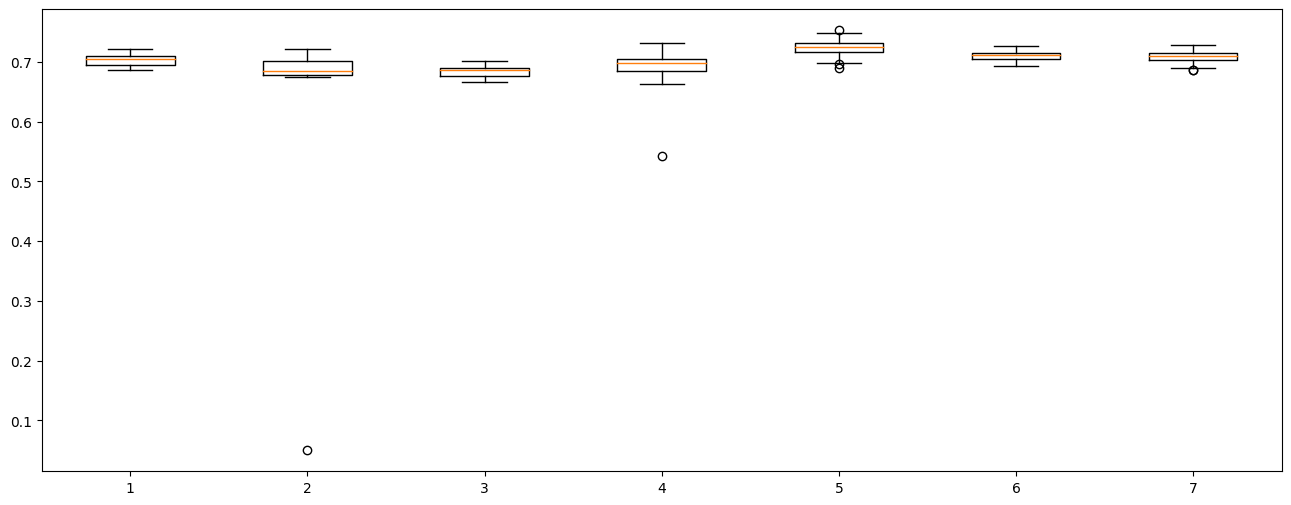

In [7]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [10]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.17688141159615628

In [11]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[2])
p_val

4.837553209754091e-07

In [12]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[3])
p_val

0.11170085007621028

In [13]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[4])
p_val

3.282912872159651e-05

In [14]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[5])
p_val

0.001733993749523443

In [15]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[6])
p_val

0.0013979270599431132

#ReLU6 Wins